# Assignment 2
## Ye Zhang
## Nov 25 2018

# 1 Autoencoder

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
from keras.layers import Input, Dense, Conv2D,MaxPooling2D,UpSampling2D,Dropout,Flatten
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Model, Sequential
import numpy as np
from keras.utils import np_utils
import tensorflow as tf
from keras import backend as K
from keras.datasets import fashion_mnist

In [5]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
print(x_train.shape)

(60000, 28, 28, 1)


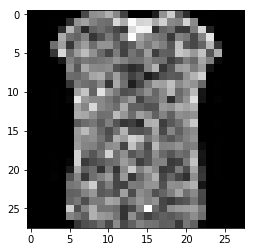

In [0]:
## A sample image is demonstrated below:
plt.imshow(x_train[61,:,:].reshape(28,28))

In [0]:
## Set up the encoder

## Set up the input placeholder

input_img = Input(shape=(28, 28, 1))

## Set up the encode
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

## Set up the decode
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 7, 7, 16)          2320      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 16)          0         
__________

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.4113 - val_loss: 0.3576
Epoch 2/10
42000/42000 [==============================] - 63s 1ms/step - loss: 0.3427 - val_loss: 0.3251
Epoch 3/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.3269 - val_loss: 0.3266
Epoch 4/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.3192 - val_loss: 0.3250
Epoch 5/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.3136 - val_loss: 0.3098
Epoch 6/10
42000/42000 [==============================] - 63s 1ms/step - loss: 0.3099 - val_loss: 0.3089
Epoch 7/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.3073 - val_loss: 0.3053
Epoch 8/10
42000/42000 [==============================] - 63s 1ms/step - loss: 0.3050 - val_loss: 0.3047
Epoch 9/10
42000/42000 [==============================] - 62s 1ms/step - loss: 0.3029 - val_loss: 0.3004
Epoch

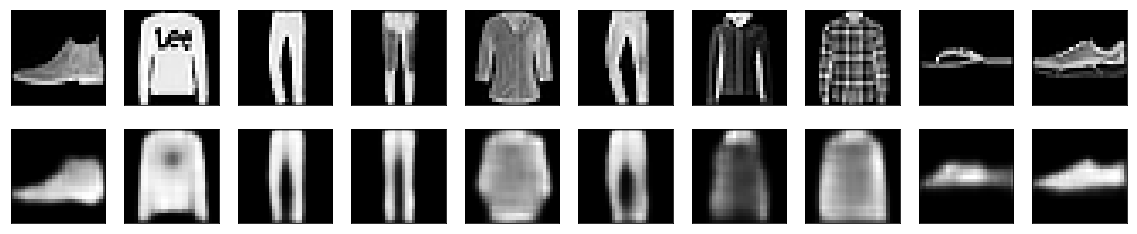

In [0]:
## Visualize some examples of images and their decoded reconstructions
plt.clf()
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i +1+ n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

The performance of the convolutional autoencoder is fairly well based on the decoded reconstruction images. We can differente each images by telling the differences of shapes. However, we expect more details from the images of the decoded autoencoder. Considering the model training time is relatively long, it is not accessible.

## Problem 2 Image Classification

## 2.1 Deep CNN

In [0]:
from keras.utils import np_utils

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
## Build the architect
from keras.models import Sequential
from keras.layers import Dropout, Flatten

model = Sequential()

## Input Convolutional layers
model.add(Conv2D(filters = 64,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
#print(model.output_shape)
model.add(Conv2D(filters = 64,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))

# Build the fully connected layer
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
__________

## description of the architectural choices:

The architechtural choice that I've made: the model has 2 convolutional layers. The first layer has 64 filters, 3 by 3 kernal size, 1 by 1 stride without padding. The activation function of the first layer is relu. The second layer also has 64 filters, 3 by 3 kernel size, and 1 by 1 strides without padding. The activation function is relu. A 2 by 2 max pooling with 0.25 dropout rate sets up. And then we continue to flatten the input. At last, one dense layer with 64 hidden nodes using relu and one dense layer with 10 hidden using softmax nodes are used in this model. The dropout rate is 0.5.

In [0]:
## Model training
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_training = model.fit(x_train, Y_train,
          epochs=10,
          batch_size=256,
          validation_data=(x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.6498 - acc: 0.7711 - val_loss: 0.3908 - val_acc: 0.8543
Epoch 2/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.4134 - acc: 0.8558 - val_loss: 0.3147 - val_acc: 0.8872
Epoch 3/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.3554 - acc: 0.8728 - val_loss: 0.2996 - val_acc: 0.8915
Epoch 4/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.3223 - acc: 0.8857 - val_loss: 0.2721 - val_acc: 0.9025
Epoch 5/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.2964 - acc: 0.8941 - val_loss: 0.2593 - val_acc: 0.9053
Epoch 6/10
60000/60000 [==============================] - 167s 3ms/step - loss: 0.2799 - acc: 0.8979 - val_loss: 0.2549 - val_acc: 0.9074
Epoch 7/10
60000/60000 [==============================] - 166s 3ms/step - loss: 0.2605 - acc: 0.9056 - val_loss: 0.2410 - 

In [0]:
y_pred = model.predict_classes(x_test)

In [0]:
# test set accuracy
(y_pred == y_test).sum()/len(y_test)

0.915

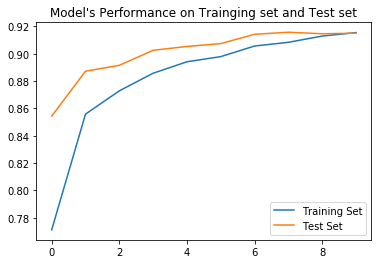

In [0]:
# Use plot to observe the model's performance on trainging set and test set
plt.plot(model_training.history["acc"], label="Training Set")
plt.plot(model_training.history["val_acc"], label="Test Set")
plt.legend()
plt.title("Model's Performance on Trainging set and Test set")
plt.show()


The accuracy of the test set is 0.915. The plot demonstrates that model performances on the test set is better than the performance on the training set. This is not always true since our epoch is only 10 and we can observe that two curve line are getting close. It is possible that the model performance on test set can be worse than the train's when the epoch increases.

## 2.2 Transfer Learning

In [0]:
from keras.applications import VGG19
#from keras.applications import ResNet50
from keras.models import Sequential


The convolutional base has a total 20,024,384 params over 22 layers

In [0]:
## Continue to resize the data
from keras.applications import ResNet50
from keras.applications import VGG19
from scipy.misc import imresize
from keras.preprocessing.image import img_to_array, array_to_img
x_train_re = np.c_[x_train,x_train,x_train]
x_test_re = np.c_[x_test,x_test,x_test]
x_train_re = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train_re])
x_test_re = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test_re])

In [20]:
#conv_base = ResNet50(weights="imagenet",include_top=False,input_shape=(48,48,3))
conv_base = VGG19(weights="imagenet",include_top=False,input_shape=(48,48,3))

80142336/80134624 [==============================] - 3s 0us/step


In [0]:
model2_2 = Sequential()
model2_2.add(conv_base)
model2_2.add(Flatten())
model2_2.add(Dense(256, activation="relu"))
model2_2.add(Dropout(0.5))
model2_2.add(Dense(10, activation="softmax"))   
conv_base.trainable = False 



In [0]:
conv_base.trainable = False

## 2.2 Model description:

The pre-trained networks that I use is VGG with a flattened input. A dense layer wirh 256 hidden nodes is used for the first layer and its activation function is relu. We added a dropout rate 0.5 and the output layer has 10 hidden nodes with softmax activation function. 

In [23]:
model2_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 20,158,282
Trainable params: 133,898
Non-trainable params: 20,024,384
_________________________________________________________________


In [0]:
## Train the transferred model
model2_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [25]:
## Training...
model_trained = model2_2.fit(x_train_re, Y_train,
          epochs=15,
          batch_size=256,
        validation_data=[x_test_re,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 50s 833us/step - loss: 2.0855 - acc: 0.2520 - val_loss: 1.8820 - val_acc: 0.3373
Epoch 2/15
60000/60000 [==============================] - 46s 760us/step - loss: 1.8663 - acc: 0.3233 - val_loss: 1.7849 - val_acc: 0.3591
Epoch 3/15
60000/60000 [==============================] - 46s 761us/step - loss: 1.7989 - acc: 0.3443 - val_loss: 1.7395 - val_acc: 0.3709
Epoch 4/15
60000/60000 [==============================] - 46s 760us/step - loss: 1.7653 - acc: 0.3570 - val_loss: 1.7186 - val_acc: 0.3742
Epoch 5/15
60000/60000 [==============================] - 46s 760us/step - loss: 1.7404 - acc: 0.3629 - val_loss: 1.6876 - val_acc: 0.3812
Epoch 6/15
60000/60000 [==============================] - 46s 761us/step - loss: 1.7246 - acc: 0.3677 - val_loss: 1.6706 - val_acc: 0.3904
Epoch 7/15
60000/60000 [==============================] - 46s 760us/step - loss: 1.7068 - acc: 0.3752 - val_loss: 1.

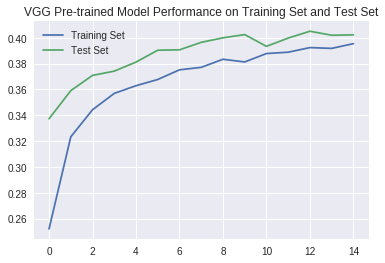

In [26]:
plt.plot(model_trained.history["acc"], label="Training Set")
plt.plot(model_trained.history["val_acc"], label="Test Set")
plt.legend()
plt.title("VGG Pre-trained Model Performance on Training Set and Test Set")
plt.show()

The visual of the model performance of the pre-trained network follows the similar pattern of the model 2.1. In general, the performance of the training set is better than the test set. We also observe that performance of the training set is greater than 0.40 and the performance of the the test set is approaching to 0.40. 

## Problem 3 Text Classification 

## 3.1 RNN

In [0]:
import pandas as pd
df_ben = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
df_mal = pd.read_csv('https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt', header = None)

In [63]:
## Label Urls
df_ben.columns = ['urls']
df_mal.columns = ['urls']
df_ben.head(6)

,urls
0,.0.blogger.gmodules.com
1,.0.client-channel.google.com
2,.0.docs.google.com
3,.0.drive.google.com
4,.0.gvt0.cn
5,.0.gvt0.com


In [64]:
df_mal.head(6)

,urls
0,.1337x.pl
1,.1link.io
2,.1n.pm
3,.22apple.com
4,.22find.com
5,.2s5m19yk.ru


In [0]:
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, Embedding
df_ben['class'] = 1
df_mal['class'] = 0
np.random.seed(0)


In [74]:
df_X = df_ben.sample(frac=5*df_mal.shape[0]/df_ben.shape[0])
df_X.shape

(6480, 2)

In [0]:
D = pd.concat([df_X, df_mal], ignore_index = True).reset_index()
tokenizer = Tokenizer(filters=None, char_level=True)
tokenizer.fit_on_texts(D['urls'])

X_train = tokenizer.texts_to_sequences(D['urls'])
y_train = D['class']

max_features = 1000
max_len = D['urls'].str.len().max()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=0)

In [0]:
X_train_max = sequence.pad_sequences(X_train, max_len)
X_test_max = sequence.pad_sequences(X_test, max_len)

In [87]:
## Set up the network
model3_1 = Sequential()
model3_1.add(Embedding(max_features, 64))
model3_1.add(SimpleRNN(32))
model3_1.add(Dropout(0.25))
model3_1.add(Dense(50, activation="relu"))
model3_1.add(Dense(1, activation="sigmoid"))
model3_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                3104      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                1650      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 51        
Total params: 68,805
Trainable params: 68,805
Non-trainable params: 0
_________________________________________________________________


In [0]:
model3_1.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [90]:
model3_1.fit(X_train_max, y_train, epochs=10, batch_size=8)

Epoch 1/10
3810/3810 [==============================] - 29s 8ms/step - loss: 0.2045 - acc: 0.9139
Epoch 2/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0764 - acc: 0.9772
Epoch 3/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0612 - acc: 0.9814
Epoch 4/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0565 - acc: 0.9824
Epoch 5/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0554 - acc: 0.9866
Epoch 6/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0523 - acc: 0.9856
Epoch 7/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0523 - acc: 0.9856
Epoch 8/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0486 - acc: 0.9853
Epoch 9/10
3810/3810 [==============================] - 27s 7ms/step - loss: 0.0438 - acc: 0.9869
Epoch 10/10
3810/3810 [==============================] - 28s 7ms/step - loss: 0.0383 - acc: 0.9898


In [91]:
result3_1=model3_1.evaluate(X_test_max , y_test, verbose=1)

1633/1633 [==============================] - 1s 875us/step


In [93]:
print("The test loss of the 3.1 model is: ")
print(result3_1[0])
print('The test accuracy of the 3.1 model is: ')
print(result3_1[1])

The test loss of the 3.1 model is: 
0.11071576846225119
The test accuracy of the 3.1 model is: 
0.9669320269442744


## 3.2 CNN

In [95]:
from keras.layers import Conv1D
model3_2=Sequential()
model3_2.add(Embedding(max_features, 64, input_length = max_len))
model3_2.add(Conv1D(32, 3, activation='relu'))
model3_2.add(Flatten())
model3_2.add(Dense(1, activation='sigmoid'))
model3_2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model3_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 85, 64)            64000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 83, 32)            6176      
_________________________________________________________________
flatten_3 (Flatten)          (None, 2656)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 2657      
Total params: 72,833
Trainable params: 72,833
Non-trainable params: 0
_________________________________________________________________


In [96]:
model3_2.fit(X_train_max, y_train, epochs=10, batch_size=8)

Epoch 1/10
3810/3810 [==============================] - 5s 1ms/step - loss: 0.2314 - acc: 0.8927
Epoch 2/10
3810/3810 [==============================] - 3s 813us/step - loss: 0.0819 - acc: 0.9709
Epoch 3/10
3810/3810 [==============================] - 3s 807us/step - loss: 0.0610 - acc: 0.9816
Epoch 4/10
3810/3810 [==============================] - 3s 817us/step - loss: 0.0553 - acc: 0.9835
Epoch 5/10
3810/3810 [==============================] - 3s 831us/step - loss: 0.0493 - acc: 0.9853
Epoch 6/10
3810/3810 [==============================] - 3s 817us/step - loss: 0.0475 - acc: 0.9850
Epoch 7/10
3810/3810 [==============================] - 3s 808us/step - loss: 0.0430 - acc: 0.9864
Epoch 8/10
3810/3810 [==============================] - 3s 820us/step - loss: 0.0409 - acc: 0.9882
Epoch 9/10
3810/3810 [==============================] - 3s 837us/step - loss: 0.0383 - acc: 0.9874
Epoch 10/10
3810/3810 [==============================] - 3s 826us/step - loss: 0.0350 - acc: 0.9866


In [97]:
result3_2=model3_2.evaluate(X_test_max , y_test, verbose=1)

1633/1633 [==============================] - 1s 572us/step


In [98]:
print("The test loss of the 3.2 model is: ")
print(result3_2[0])
print('The test accuracy of the 3.2 model is: ')
print(result3_2[1])

The test loss of the 3.2 model is: 
0.05730639954724347
The test accuracy of the 3.2 model is: 
0.9865278628291488


## 3.3 

In [0]:
from sklearn.metrics import roc_curve
y_pred_31 = model3_1.predict(X_test_max).ravel()
fpr_31, tpr_31, thresholds_31 = roc_curve(y_test, y_pred_31)
y_pred_32 = model3_2.predict(X_test_max).ravel()
fpr_32, tpr_32, thresholds_32 = roc_curve(y_test, y_pred_32)

In [0]:
## Set up the ROC curve

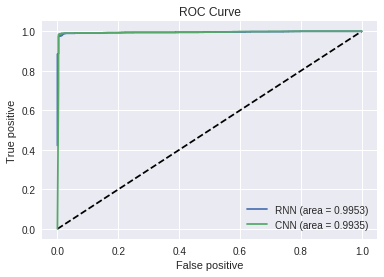

In [107]:
from sklearn.metrics import auc
auc_31 = auc(fpr_31, tpr_31)
auc_32 = auc(fpr_32, tpr_32)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_31, tpr_31, label='RNN (area = {:.4f})'.format(auc_31))
plt.plot(fpr_32, tpr_32, label='CNN (area = {:.4f})'.format(auc_32))
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


The RNN and CNN have similar performance based on the ROC Curve, the RNN performs better than the CNN